In [82]:
# import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

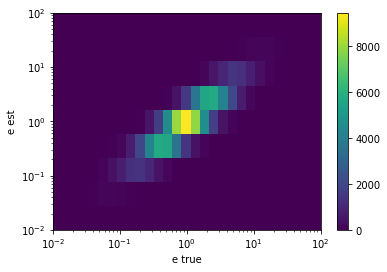

In [186]:
E_est, E_T = np.exp(np.random.multivariate_normal([0, 0], cov=[[1, 0.9], [0.9, 1]], size=100000).T)
e_est_bins = np.logspace(-2, 2, 10)
e_true_bins = np.logspace(-2, 2, 30)

h, _, _, _ = plt.hist2d(E_T, E_est, bins=[e_true_bins, e_est_bins])
plt.xlabel('e true')
plt.ylabel('e est')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()
None

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


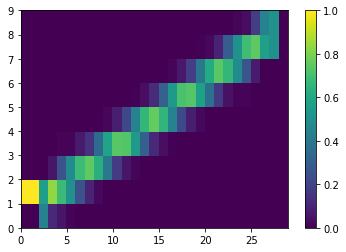

In [187]:
hn = (h / h.sum(axis=1)[:, None])
hn = np.nan_to_num(hn)
# hn.sum(axis=0)
plt.pcolormesh(hn.T)
plt.colorbar()


Discretize $p(x, y)$ directly by building histogram in bins $\Delta x$ and $\Delta y$

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


v sum is: 49499
Truth: 49499.0
f_y_c_x 49499.0


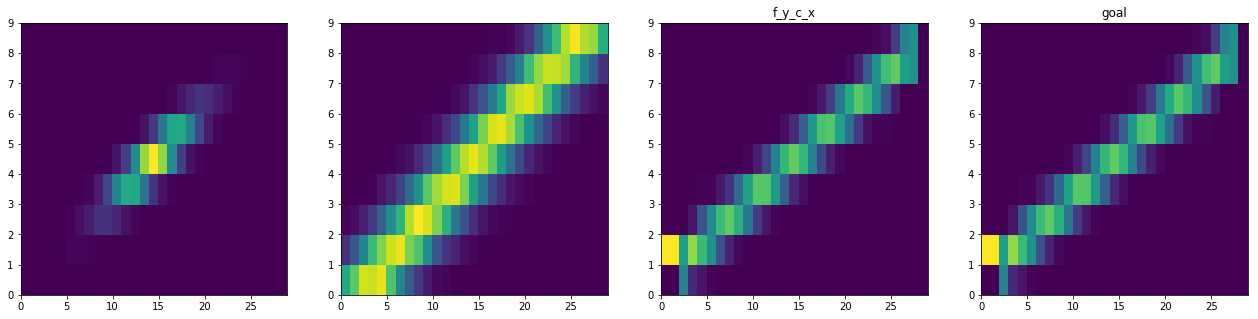

In [188]:
f_xy, _, _ = np.histogram2d(E_T, E_est, bins=[e_true_bins, e_est_bins])
f_y, _ = np.histogram(E_est, bins=e_est_bins)
f_x, _ = np.histogram(E_T, bins=e_true_bins)

# f_x_c_y = f_xy / f_y
wx = np.diff(e_true_bins)
wy = np.diff(e_est_bins)

f_y_c_x = np.nan_to_num((f_xy) / (f_x[:, None]))
fn = np.nan_to_num(f_xy / f_xy.sum(axis=1)[:, None])

f, [ax2, ax3, ax4, ax5] =plt.subplots(1, 4, figsize=(22, 5))
ax2.pcolormesh(f_xy.T)
ax3.pcolormesh(f_x_c_y.T)

ax4.pcolormesh(f_y_c_x.T)
ax4.set_title('f_y_c_x')


ax5.pcolormesh(fn.T)
ax5.set_title('goal')
# f.colorbar(im)


v, _ = np.histogram(np.random.randn(100000), bins=e_true_bins)
print('v sum is:', v.sum() )
g = (fn.T @ v[:, None])
print('Truth:', g.sum())

# g = (f_x_c_y.T @ v[:, None])
# print('f_x_c_y', g.sum())

g = (np.nan_to_num(f_y_c_x.T) @ v[:, None])
print('f_y_c_x', g.sum())



(100000, 100000, 100000.0)

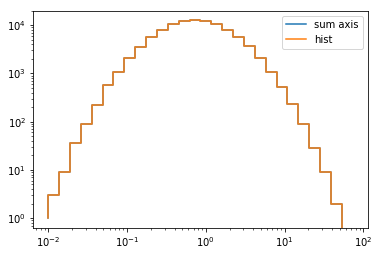

In [189]:
plt.step(e_true_bins[:-1], f_xy.sum(axis=1), label='sum axis')
plt.step(e_true_bins[:-1], f_x, label='hist')
plt.legend()
plt.yscale('log')
plt.xscale('log')

len(E_T), sum(f_x), f_xy.sum()